In [1]:
import os
import glob
import random

import numpy as np
import pyrender
import trimesh
from PIL import Image

In [2]:
files = glob.glob("citydata/buildingnet/meshes/*.obj")

In [101]:
# file = random.choice(files)
file = "/home/ubuntu/text2building_data/citydata/buildingnet/meshes/RESIDENTIALhouse_mesh7278.obj"
print(file)
scene = trimesh.load(file, force="mesh")
scene.show()

/home/ubuntu/text2building_data/citydata/buildingnet/meshes/RESIDENTIALhouse_mesh7278.obj


In [102]:
voxel_file = "/home/ubuntu/text2building_data/citydata/buildingnet/voxels/RESIDENTIALhouse_mesh7278.binvox"

voxel_grid = trimesh.load(voxel_file)
voxel_grid.show()

In [76]:
n_points = 100_000
boxsize = np.max(voxel_grid.extents)
points = np.random.rand(n_points, 3).astype(np.float16)
points = boxsize * (points - 0.5)

In [77]:
N = voxel_grid.shape[0]
point_indices = voxel_grid.points_to_indices(points)

In [78]:
N = voxel_grid.shape[0]
point_indices = voxel_grid.points_to_indices(points)
# Clip the indices to the shape of the voxel grid N. Points that are
# outside the grid will be given an index of N, which blows up indexing.
clipped_point_indices = np.clip(point_indices, 0, N - 1)
occupancies = voxel_grid.matrix[clipped_point_indices[:, 0], clipped_point_indices[:, 1], clipped_point_indices[:, 2]]
# For any points that fell outside of the bounding box of the 
occupancies[(point_indices[:, 0] >= N) | (point_indices[:, 1] >= N) | (point_indices[:, 2] >= N)] = False

In [79]:
np.savez_compressed("test.npz", points=points, occupancies=np.packbits(occupancies))

In [80]:
occupancy_points = np.load("test.npz")

In [103]:
occupancy_points_file = "/home/ubuntu/text2building_data/citydata/buildingnet/occupancy_points/RESIDENTIALhouse_mesh7278.npz"
occupancy_points = np.load(occupancy_points_file)

In [104]:
occupancy_points["points"]

array([[-0.4983  ,  0.008064,  0.3186  ],
       [-0.2605  , -0.2524  ,  0.4243  ],
       [-0.4592  , -0.0809  ,  0.014114],
       ...,
       [-0.473   ,  0.3655  , -0.3452  ],
       [ 0.0867  ,  0.4102  ,  0.02167 ],
       [ 0.3533  , -0.215   , -0.4104  ]], dtype=float16)

In [83]:
import pyvista as pv

In [105]:
o = np.unpackbits(occupancy_points["occupancies"]).astype(bool)
o.shape

(100000,)

In [97]:
o

array([False, False, False, ..., False, False, False])

In [98]:
occupancy_points["points"][o]

array([[-0.03075,  0.0126 ,  0.4077 ],
       [-0.1593 , -0.02545,  0.4038 ],
       [-0.0494 ,  0.03226,  0.3276 ],
       ...,
       [-0.05493,  0.04184,  0.44   ],
       [ 0.1411 , -0.03906, -0.2404 ],
       [-0.11816, -0.0519 ,  0.4895 ]], dtype=float16)

In [106]:
points = pv.PointSet(occupancy_points["points"][o].astype(np.float32))

In [88]:
pv.start_xvfb()

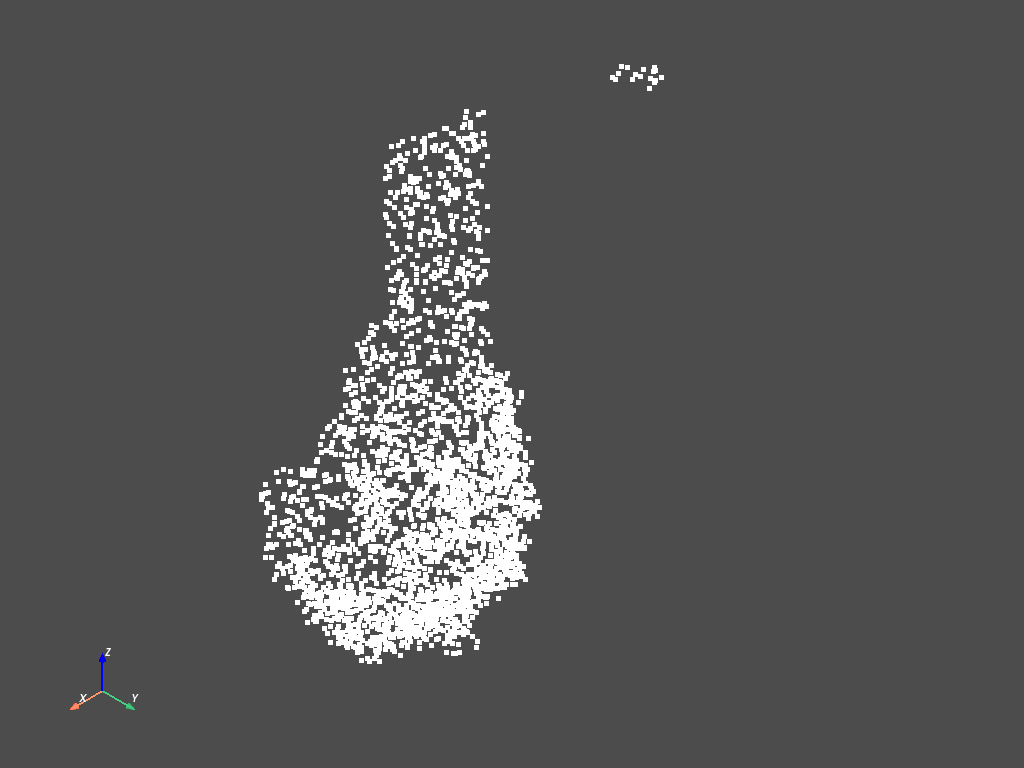

In [107]:
points.plot(jupyter_backend="static")